# Sea Surface Temperatures

## OISST dataset

The NOAA 1/4° daily Optimum Interpolation Sea Surface Temperature (or daily OISST) Climate Data Record (CDR) provides complete ocean temperature fields constructed by combining bias-adjusted observations from different platforms (satellites, ships, buoys) on a regular global grid, with gaps filled in by interpolation.

**Data source :** [ncei.noaa.gov](https://www.ncei.noaa.gov/products/climate-data-records/sea-surface-temperature-optimum-interpolation)

**Plots for comparison :** [climatereanalyzer.org](https://climatereanalyzer.org/clim/sst_daily/)

**Adapted from :** https://juliaocean.github.io/Climatology.jl/dev/examples/sst_anomaly_notebook.html

In [4]:
if !isdefined(Main,:Glob)
    using Pkg; Pkg.activate(temp=true)
    Pkg.add.(["Climatology", "NCDatasets","CairoMakie", "Glob"])
end
using Climatology, NCDatasets, CairoMakie, Glob

In [5]:
input_path=Climatology.SST_demo_path
path_OISST_stats=Climatology.downloads.OISST_stats_download()

"/Users/gaelforget/.julia/scratchspaces/124859b0-ceae-595e-8997-d05f6a7a8dfe/datadeps/OISST-stats1"

In [9]:
# of days in between maps? $(b_fil_delta)
fil_del=1

## Regional SST timeseries
lon0=205; lat0=25

show_anom=true;
show_clim=false;

begin
	dlon=10.0
	dnl=Int(dlon/0.25)
	(df,gdf,kdf)=SST_coarse_grain.lowres_read(fil="lowres_oisst_sst_$(dlon).csv",path=path_OISST_stats)
	show(df)
end

# ╔═╡ 27c6c10b-93f0-4b3c-910c-a52c9b30ddf3
begin
	kdf0=kdf[SST_coarse_grain.lowres_index(lon0,lat0,kdf)]
	(lon1,lat1)=SST_coarse_grain.lowres_position(kdf0.i,kdf0.j,kdf)
end

8512140×4 DataFrame
     Row │ i      j      t         sst       
         │ Int64  Int64  Int64     Float64   
─────────┼───────────────────────────────────
       1 │     1      2  19820101  -0.240948
       2 │     2      2  19820101  -0.347843
       3 │     3      2  19820101  -0.660196
       4 │     7      2  19820101  -0.995135
       5 │     8      2  19820101  -1.19049
       6 │    17      2  19820101  -1.1207
       7 │    18      2  19820101  -0.681981
       8 │    19      2  19820101  -0.605515
       9 │    20      2  19820101  -1.10193
      10 │    21      2  19820101  -1.16746
      11 │    22      2  19820101  -1.42289
    ⋮    │   ⋮      ⋮       ⋮          ⋮
 8512131 │    27     18  20240906  -1.62683
 8512132 │    28     18  20240906  -1.56852
 8512133 │    29     18  20240906  -1.62192
 8512134 │    30     18  20240906  -1.59569
 8512135 │    31     18  20240906  -1.611
 8512136 │    32     18  20240906  -1.61363
 8512137 │    33     18  20240906  -1.61438
 85121

(205.0, 25.0)

16-element Vector{String}:
 "/var/folders/vn/3r695jqd3177cw09wdmf3z940000gn/T/demo_OISST"
 "oisst-avhrr-v02r01.20240911.nc"
 "oisst-avhrr-v02r01.20240912_preliminary.nc"
 "oisst-avhrr-v02r01.20240913_preliminary.nc"
 "oisst-avhrr-v02r01.20240914_preliminary.nc"
 "oisst-avhrr-v02r01.20240915_preliminary.nc"
 "oisst-avhrr-v02r01.20240916_preliminary.nc"
 "oisst-avhrr-v02r01.20240917_preliminary.nc"
 "oisst-avhrr-v02r01.20240918_preliminary.nc"
 "oisst-avhrr-v02r01.20240919_preliminary.nc"
 "oisst-avhrr-v02r01.20240920_preliminary.nc"
 "oisst-avhrr-v02r01.20240921_preliminary.nc"
 "oisst-avhrr-v02r01.20240922_preliminary.nc"
 "oisst-avhrr-v02r01.20240923_preliminary.nc"
 "oisst-avhrr-v02r01.20240924_preliminary.nc"
 "oisst-avhrr-v02r01.20240925_preliminary.nc"

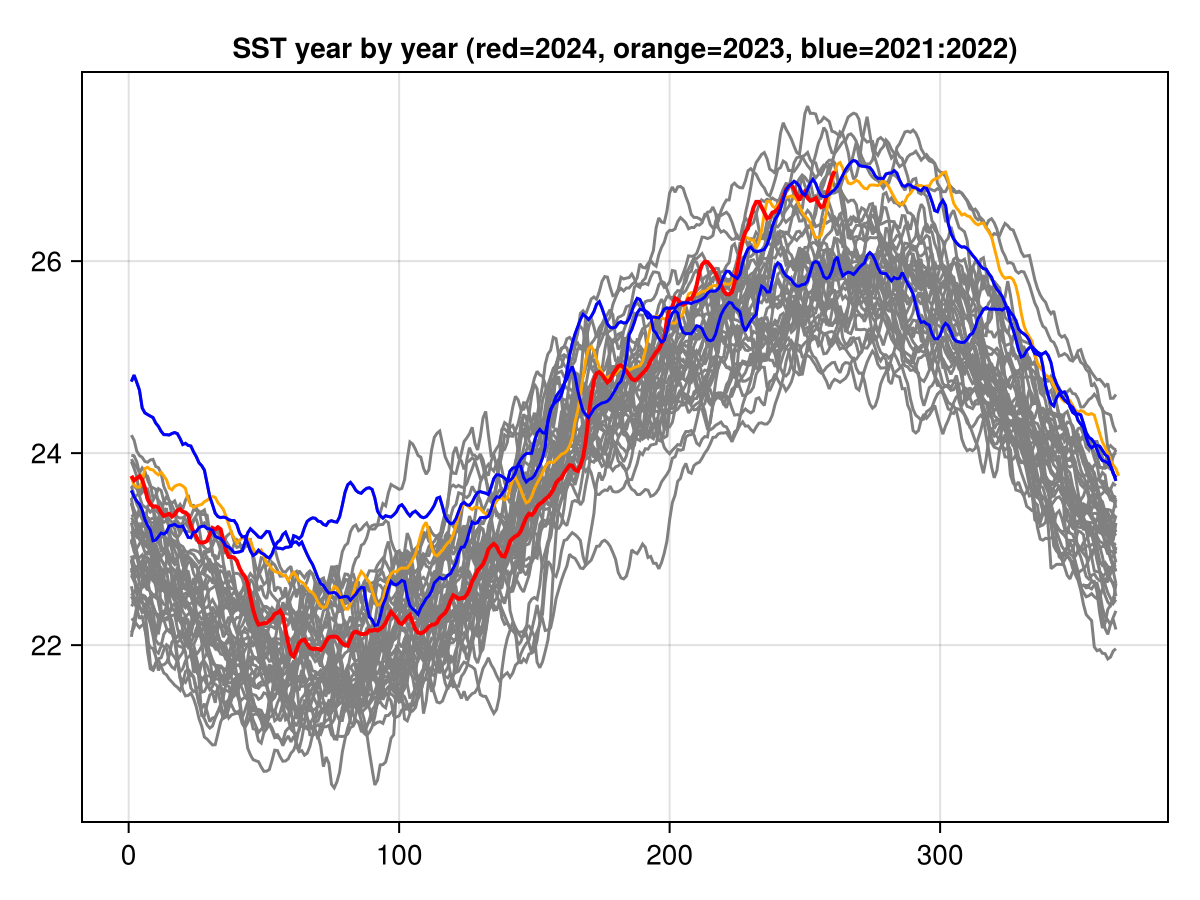

In [12]:
begin
    (fil1,fil2)=SST_FILES.file_lists(path=input_path)
	list=SST_FILES.read_files_list(path=input_path)
    files_list=SST_processing.download_files(path=input_path,short_demo=true)
	display([input_path;basename.(files_list)])
end

fil_sst=files_list[end]
ano_sst=true
ano_ncei=false

ts=SST_timeseries.calc(kdf0,list,gdf=gdf)
f3b=plot(SSTdiag(options=(plot_type=:by_year,ts=ts)))
#save_fig(f3b,doSave,file="sst_local_by_year.png")